<center><h1 style="font-size:35px; font-family: 'Times New Roman'; letter-spacing: 0.1em;">House Price Prediction 🏠Task-I Data Preprocessing</h1></center>

<h2 style="font-family: 'Times New Roman'; letter-spacing: 0.05em;">About the Dataset</h2>

- **ID**: Identification number for each property (not a predictor, likely just a unique identifier).
- **OverallQual**: Overall material and finish quality of the house (rated on a scale from 1 to 10).
- **GrLivArea**: Above ground living area in square feet.
- **YearBuilt**: The original construction date of the house.
- **TotalBsmtSF**: Total square feet of the basement area.
- **FullBath**: Number of full bathrooms above ground.
- **HalfBath**: Number of half bathrooms above ground.
- **GarageCars**: Size of the garage in terms of car capacity.
- **GarageArea**: Size of the garage in square feet.
- **SalePrice**: The property's sale price in dollars (the target variable for prediction).

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Importing the required Libraries, Metrics</h1>

 ### Installing the packages listed in the requirements.txt file

In [30]:
!pip install -r requirements.txt

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Loading the Data</h1>

In [32]:
df = pd.read_csv("../Data/sample_dataset.csv")

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Exploratory Data Analysis</h1>

In [33]:
df.head()

,ID,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
0,1,5,629,2022,702,1,0,3,627,457528
1,2,2,2402,1972,251,1,1,3,705,78691
2,3,7,1547,1968,1224,3,0,1,282,316056
3,4,1,666,1937,2890,4,1,3,39,213285
4,5,9,2946,1985,768,2,1,4,848,304717


***Checking the size—of the data***

In [34]:
df.shape

(1000, 10)

***Analyzing column data types and checking the count of non-missing values within each column.***

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           1000 non-null   int64
 1   OverallQual  1000 non-null   int64
 2   GrLivArea    1000 non-null   int64
 3   YearBuilt    1000 non-null   int64
 4   TotalBsmtSF  1000 non-null   int64
 5   FullBath     1000 non-null   int64
 6   HalfBath     1000 non-null   int64
 7   GarageCars   1000 non-null   int64
 8   GarageArea   1000 non-null   int64
 9   SalePrice    1000 non-null   int64
dtypes: int64(10)
memory usage: 78.3 KB


***Statistical summary of dataset***

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1000.0,500.500,288.819436,1.0,250.75,500.5,750.25,1000.0
OverallQual,1000.0,5.617,2.920760,1.0,3.00,6.0,8.00,10.0
GrLivArea,1000.0,1996.309,883.054538,500.0,1223.75,1966.0,2800.00,3499.0
YearBuilt,1000.0,1960.760,35.169351,1900.0,1931.00,1963.0,1991.00,2022.0
TotalBsmtSF,1000.0,1740.401,1007.061464,0.0,838.75,1733.0,2599.50,3499.0
FullBath,1000.0,2.506,1.135453,1.0,1.00,3.0,4.00,4.0
HalfBath,1000.0,0.994,0.809085,0.0,0.00,1.0,2.00,2.0
GarageCars,1000.0,2.038,1.406604,0.0,1.00,2.0,3.00,4.0
GarageArea,1000.0,484.786,282.732658,0.0,239.00,500.0,705.50,1000.0
SalePrice,1000.0,270963.885,129264.336981,50363.0,157806.75,268642.5,385333.25,499208.0


***Visualizing the dataset statistics using violin plots to compare column distributions***

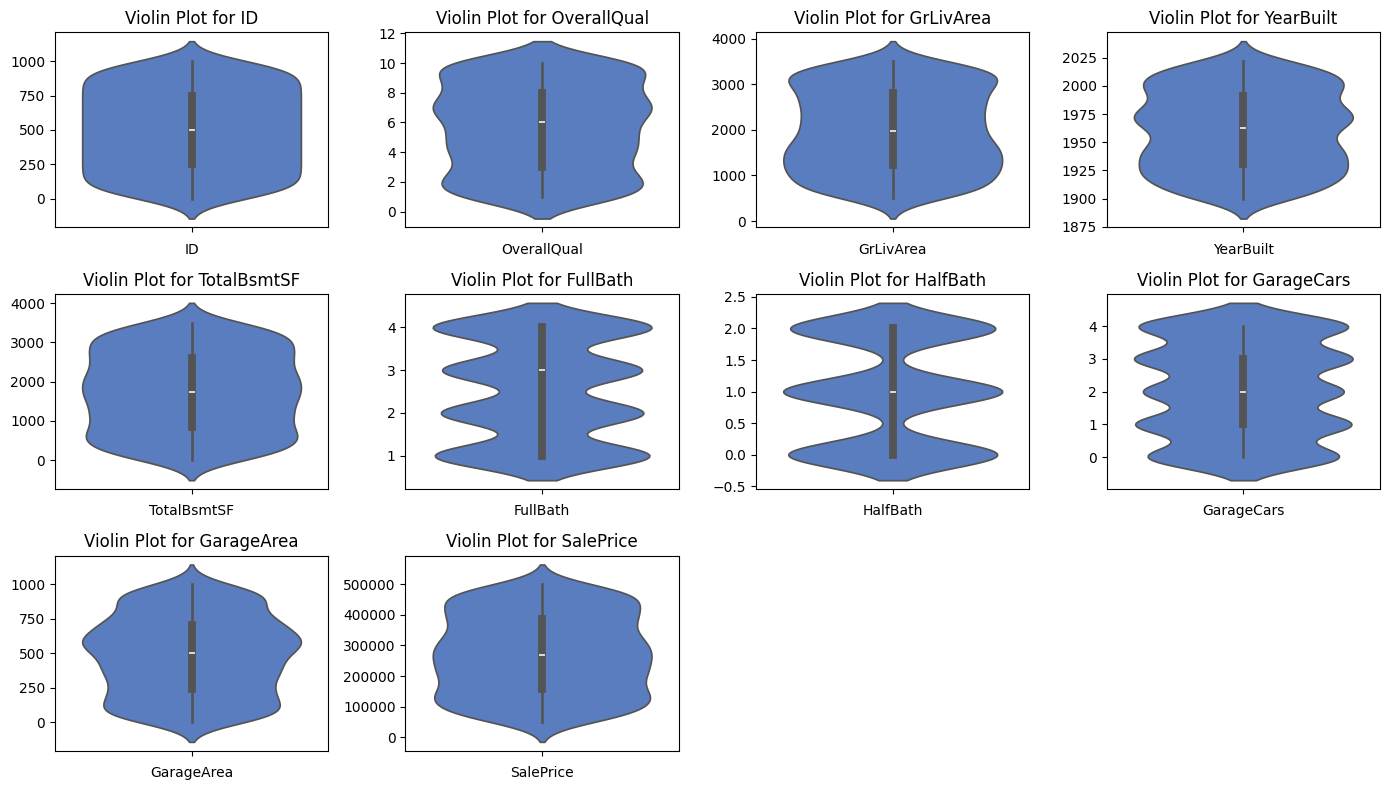

In [37]:
num_cols = len(df.select_dtypes(include='number').columns)
num_rows = (num_cols + 3) // 4  # Adjust the number of rows based on the number of columns

plt.figure(figsize=(14, 8))
for i, column in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(num_rows, 4, i+1)
    sns.violinplot(y=df[column], palette='muted')
    plt.title(f'Violin Plot for {column}')
    plt.ylabel('')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

***Visualizing the correlations between numerical variables***

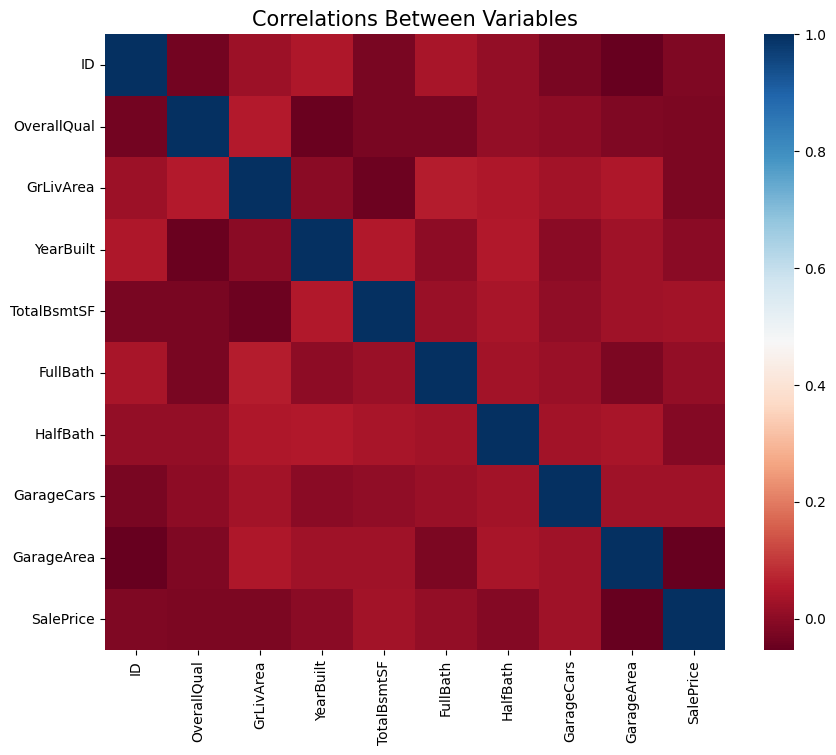

In [38]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

***Checking for the missing values***

In [39]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
ID             0
OverallQual    0
GrLivArea      0
YearBuilt      0
TotalBsmtSF    0
FullBath       0
HalfBath       0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


In [40]:
df['price_for_sft'] = df["SalePrice"]/df["TotalBsmtSF"]

***Checking for the Outliers***

In [41]:
def visualize_iqr_boxplot(df):
    # Boxplot showing IQR for each numeric column
    plt.figure(figsize=(30, 8))
    sns.boxplot(data=df.select_dtypes(include='number'), orient='h', palette='Set2')
    plt.title('Interquartile Range (IQR) for Numeric Columns')
    plt.xlabel('Values')
    plt.ylabel('Columns')
    plt.tight_layout()
    plt.show()

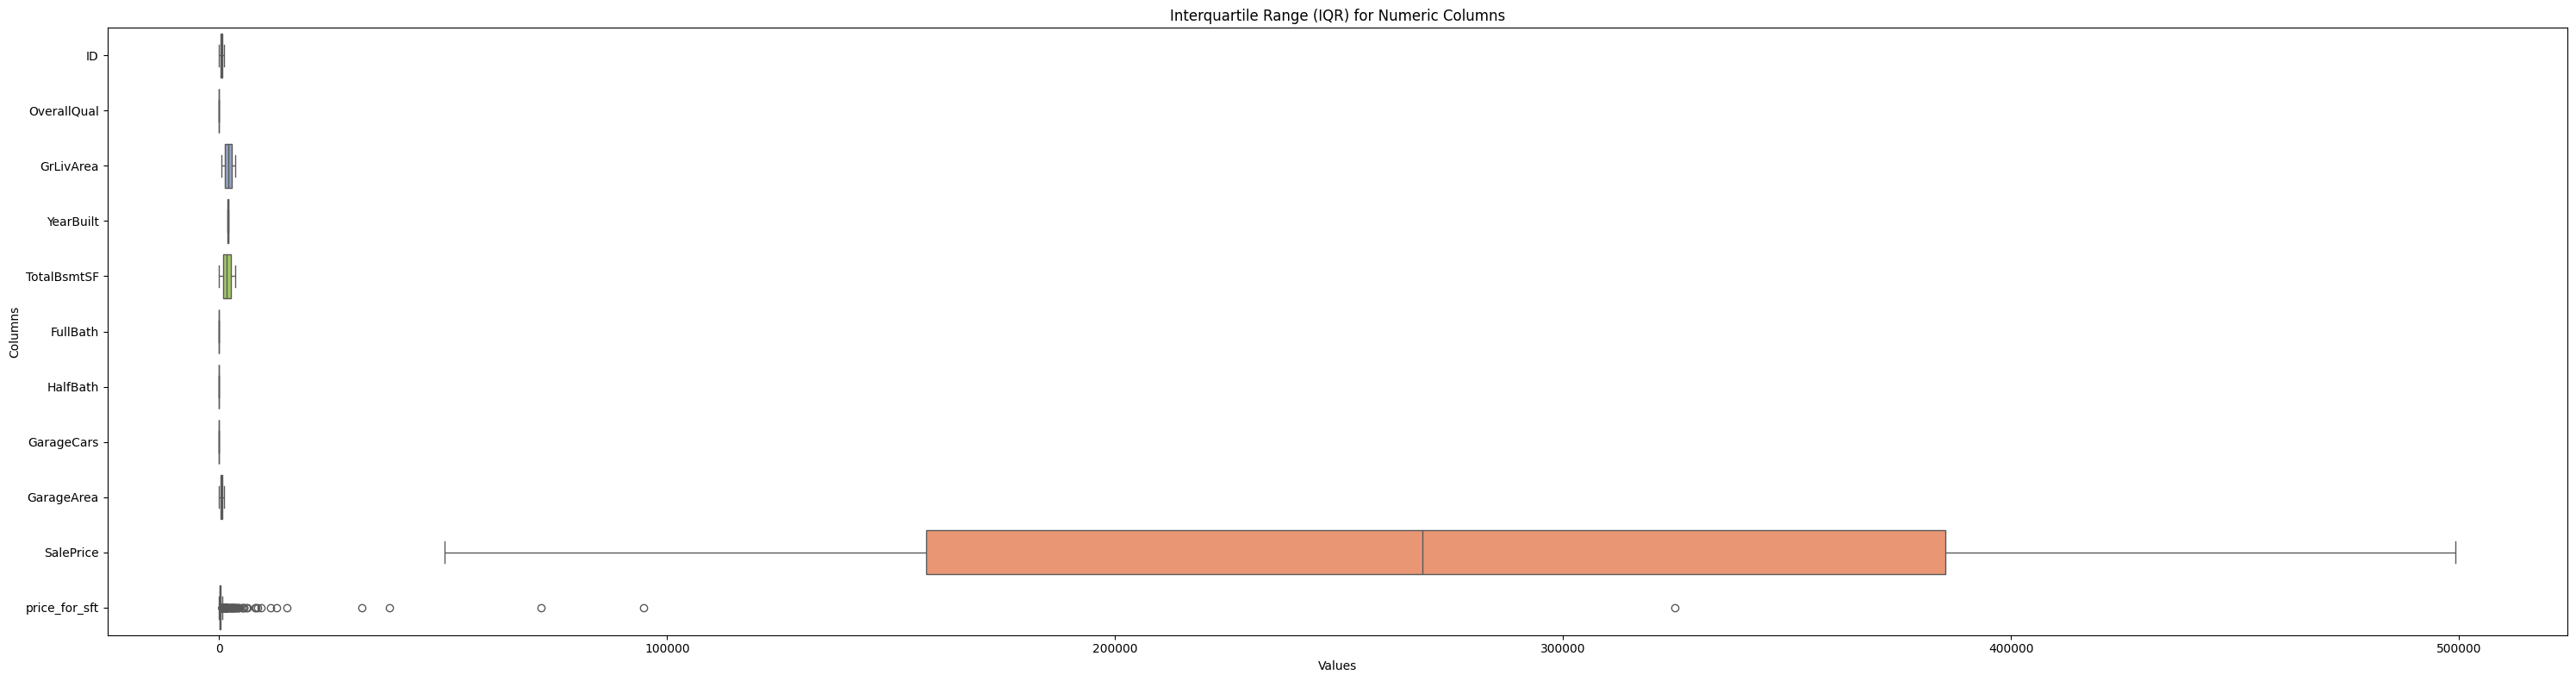

In [42]:
visualize_iqr_boxplot(df)

In [43]:
# Creating a function to show the number of outliers per column.
def check_skewness_outliers(df):
    " Create a function to show the number of outliers per column."
    # numeric column list
    numeric_cols= df.select_dtypes(include= 'number').columns

    # compute features skewness
    skewed= df.skew(numeric_only= True).sort_values(ascending= False).to_frame().reset_index()
    skewed.columns= ['feature', 'skewness']

    outliers= []
    for col in numeric_cols:
        quantile_25= df[col].quantile(0.25)
        quantile_75= df[col].quantile(0.75)
        IQR= quantile_75 - quantile_25
        upper= quantile_75 + 1.5* IQR
        lower= quantile_25 - 1.5* IQR 
        outlier_df= df[(df[col]> upper) | (df[col]< lower)]
        outliers.append(outlier_df[col].nunique())

    # Create a DataFrame to store the outlier count
    outlier_df= skewed.assign(outliers_num= outliers).sort_values('outliers_num', ascending= False).reset_index(drop= True)
    # Show only features that have outliers.
    return outlier_df[outlier_df.iloc[:, 2] > 0]

In [44]:
# Outliers
def check_empty_dataframe_and_print(df):
    if df.empty:
        print("No outliers present.")
    else:
        print("Data frame present:")
        print(df)

# Usage example:
# Replace df1 with your actual DataFrame name
check_empty_dataframe_and_print(check_skewness_outliers(df))


Data frame present:
         feature  skewness  outliers_num
0  price_for_sft       NaN           124


***Duplicates***

In [45]:
def clip_outliers(df, lower_quantile=0.25, upper_quantile=0.75):
    " Create a function to clip outliers in numeric columns."
    # Numeric column list
    numeric_cols = df.select_dtypes(include='number').columns

    # Compute features quartiles
    quantiles = df.quantile([lower_quantile, upper_quantile])

    # Clip outliers for each numeric column
    for col in numeric_cols:
        lower_bound = quantiles[col][lower_quantile]
        upper_bound = quantiles[col][upper_quantile]
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

# Apply the function to clip outliers in your DataFrame
# Assuming your DataFrame is named 'your_data'
clipped_data = clip_outliers(df)

In [46]:
print(f"- There is {df.duplicated().sum()} duplicates in the dataset.")

- There is 0 duplicates in the dataset.


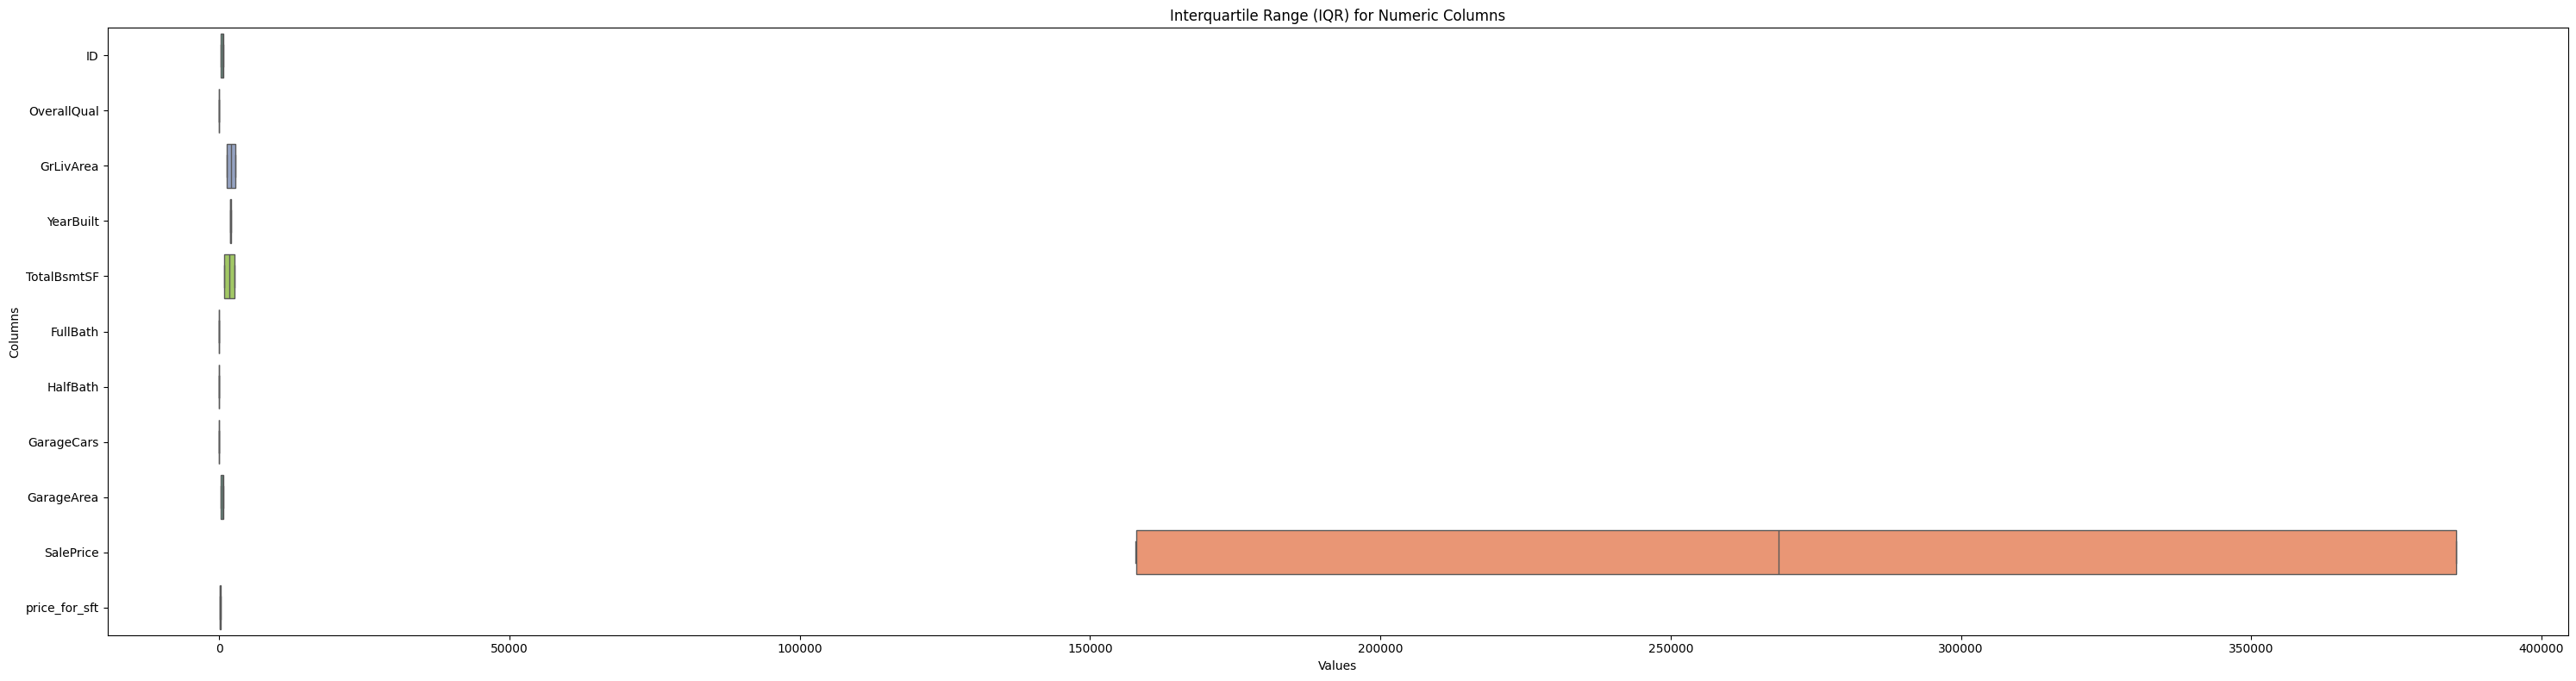

In [47]:
visualize_iqr_boxplot(df)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;"> Exploring data and find patterns</h1>

***Target variable distribution***

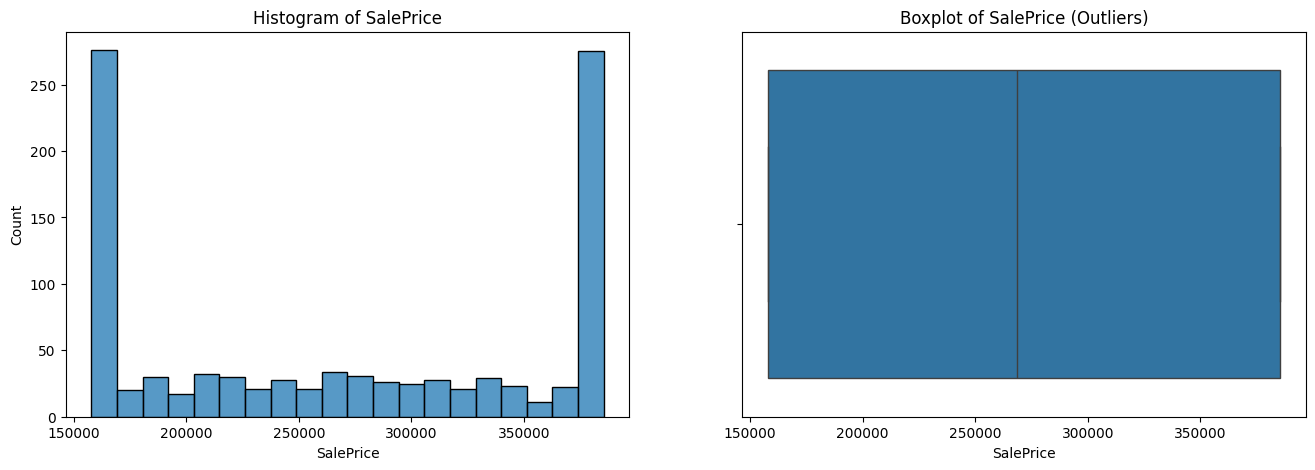

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(x="SalePrice", data=df, bins=20, ax=ax1[0])
ax1[0].set(title="Histogram of SalePrice")

sns.boxplot(x="SalePrice", data=df, ax=ax1[1])
ax1[1].set(title="Boxplot of SalePrice (Outliers)")

plt.show()

***Find correlations***

Text(0.5, 1.0, 'Correlation of the target variable with other features')

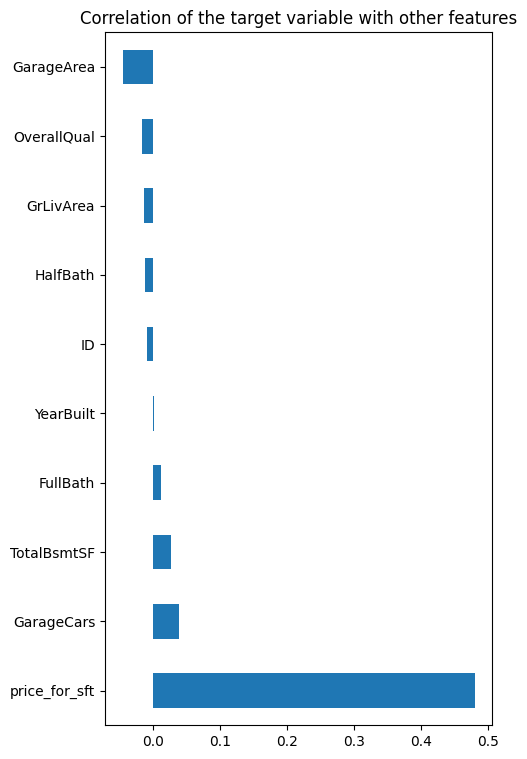

In [49]:
corr= df.corr(numeric_only= True)
target_corr= corr["SalePrice"].sort_values(ascending= False)
plt.figure(figsize= (5, 9))
target_corr.drop('SalePrice').plot(kind= 'barh')
plt.title('Correlation of the target variable with other features')

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Saving preprocessed data to CSV format</h1>

In [50]:
df.to_csv('../Data/preprocessed_data.csv', index=False)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Splitting the data tinto X, y</h1>

In [51]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [52]:
X.shape

(1000, 10)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">One-Hot Encoding</h1>

***Encoding the categorical features in X dataset by using One-Hot Encoding method***

In [53]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)


[]


***The dataset doesn't include any categorical values, so encoding techniques were not applied***

In [54]:
#Apply if you have any categorical
# X = pd.get_dummies(X, columns=categorical_columns)

<h1 style="font-family: 'Times New Roman'; letter-spacing: 0.08em;">Train-Test Split</h1>

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Save the arrays directly into the Data folder
np.save('../Data/X_train.npy', X_train)
np.save('../Data/X_test.npy', X_test)
np.save('../Data/y_train.npy', y_train)
np.save('../Data/y_test.npy', y_test)
np.save('../Data/X.npy', X)
np.save('../Data/y.npy', y)

# <span style="font-family: 'Times New Roman', Times, serif;">Observations</span>

### Data Quality
- ***No missing values are found throughout the dataset.***
- ***There are no outliers or unusual values present.***
- ***Each entry is unique; no duplicated data is identified.***

### Variable Types
- ***The dataset doesn't include any categorical values, so encoding techniques were not applied.***
